# **TikTok Project**

TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work already completed and is requesting assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

A follow-up email from the Data Science Lead, Willow Jaffey: Willow suggests including an executive summary of your analysis to share with teammates.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:

*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



* Check mean and median and range of values
* Use box plot to understand distribution
* Data points that are in +- 1.5 * IQR
* Data points that are in +- 3*sd
* Outlier should not miss any important information.
* There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis, according to what your goals are for the model you are planning to construct.
    * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
    * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
    * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset into dataframe
data = pd.read_csv("TikTokDataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

In [3]:
# Display and examine the first few rows of the dataframe
data.head()


,s_no,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape


(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   s_no                      19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
data.describe(include="all")


,s_no,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


The visualizations most helpful for considering the distribution of the data include box plots and histograms. Visualizing the distribution of the data can inform the next steps and considerations in data analysis. For example, data distribution will inform which types of modeling is needed.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

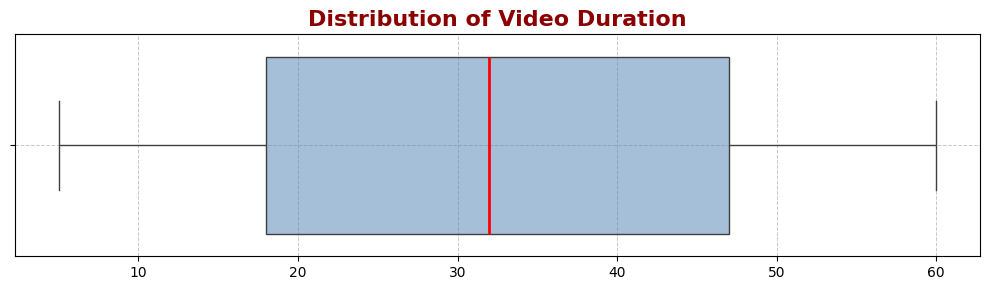

In [8]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(10, 3))  # width=10, height=6 in inches
sns.boxplot(data=data, x="video_duration_sec", flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Distribution of Video Duration", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

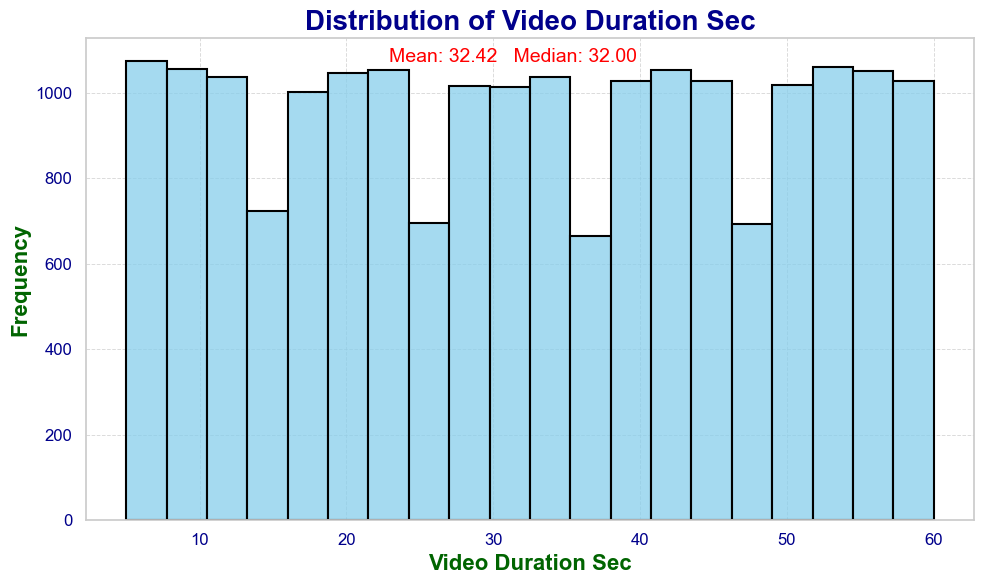

In [9]:
# Create a histogram
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))
feature = 'video_duration_sec'
# Plot the histogram
sns.histplot(data[feature], bins=20, color="skyblue", edgecolor="black", linewidth=1.5, kde=False)

# Customize the title and labels
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel(f"{feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Add some text annotation (optional)
plt.text(plt.xlim()[1]*0.5, plt.ylim()[1]*0.95, f'Mean: {data[feature].mean():.2f}   Median: {data[feature].median():.2f}', fontsize=14, color='red', ha='center')

# Display the plot
plt.tight_layout()
plt.show()


#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

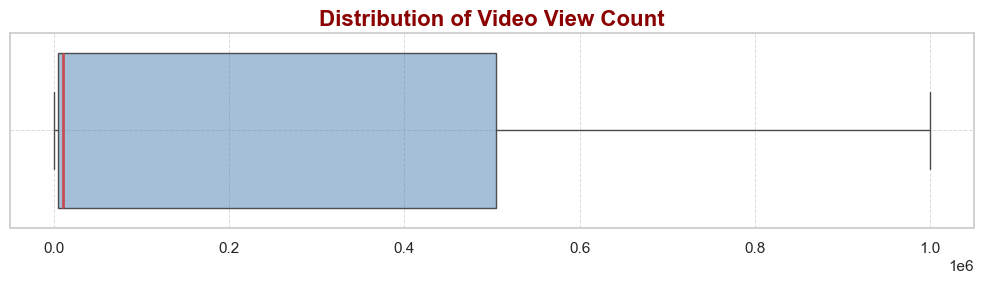

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
feature = 'video_view_count'

plt.figure(figsize=(10, 3))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()



Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

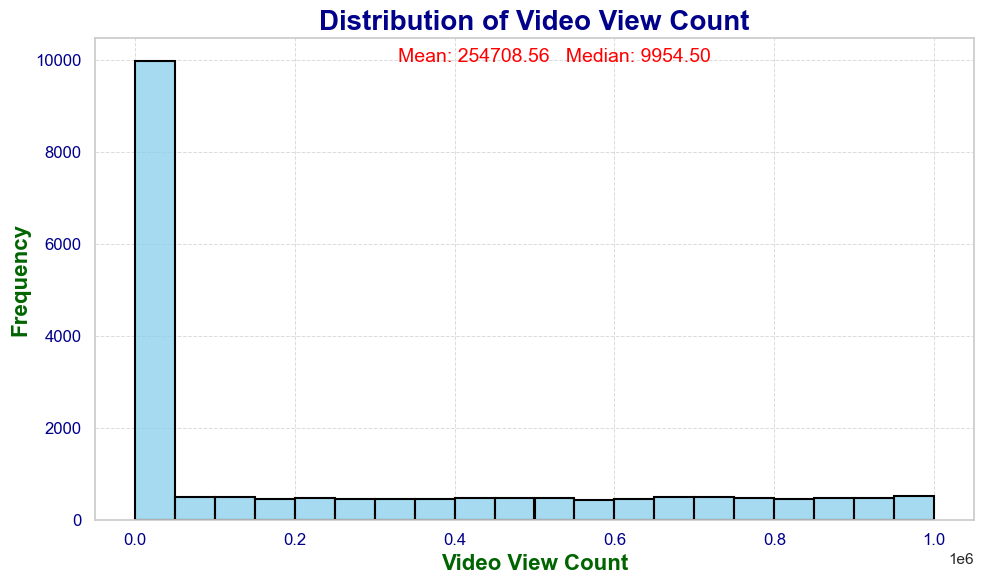

In [11]:
# Create a histogram
feature = 'video_view_count'

sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data[feature], bins=20, color="skyblue", edgecolor="black", linewidth=1.5, kde=False)

# Customize the title and labels
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel(f"{feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Add some text annotation (optional)
plt.text(plt.xlim()[1]*0.5, plt.ylim()[1]*0.95, f'Mean: {data[feature].mean():.2f}   Median: {data[feature].median():.2f}', fontsize=14, color='red', ha='center')

# Display the plot
plt.tight_layout()
plt.show()

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

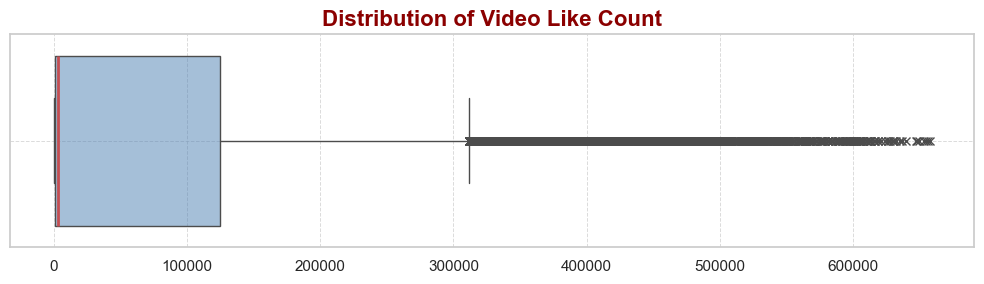

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
feature = 'video_like_count'

plt.figure(figsize=(10, 3))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

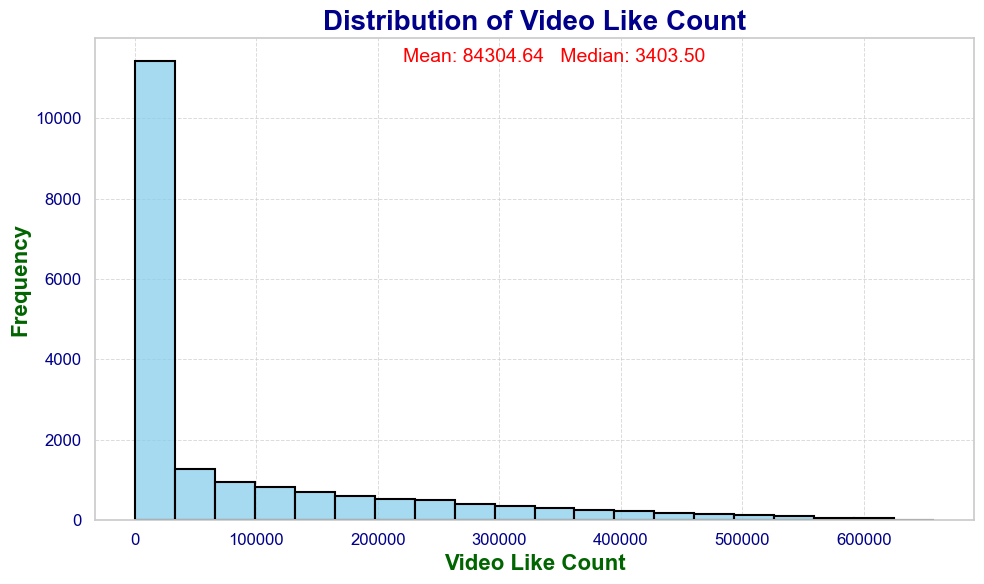

In [13]:
# Create a histogram
feature = 'video_like_count'

sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data[feature], bins=20, color="skyblue", edgecolor="black", linewidth=1.5, kde=False)

# Customize the title and labels
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel(f"{feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Add some text annotation (optional)
plt.text(plt.xlim()[1]*0.5, plt.ylim()[1]*0.95, f'Mean: {data[feature].mean():.2f}   Median: {data[feature].median():.2f}', fontsize=14, color='red', ha='center')

# Display the plot
plt.tight_layout()

# Save the plot with high DPI
plt.savefig('Figures/Distribution of video Like Count.png', dpi=300)

plt.show()


#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

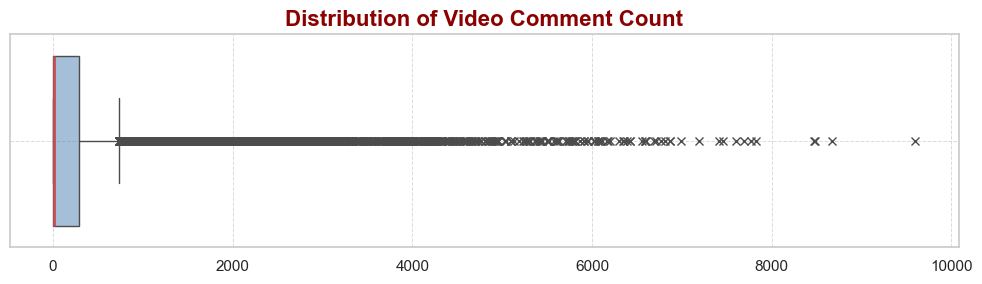

In [14]:
# Create a boxplot to visualize distribution of `video_comment_count`
feature = 'video_comment_count'

plt.figure(figsize=(10, 3))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

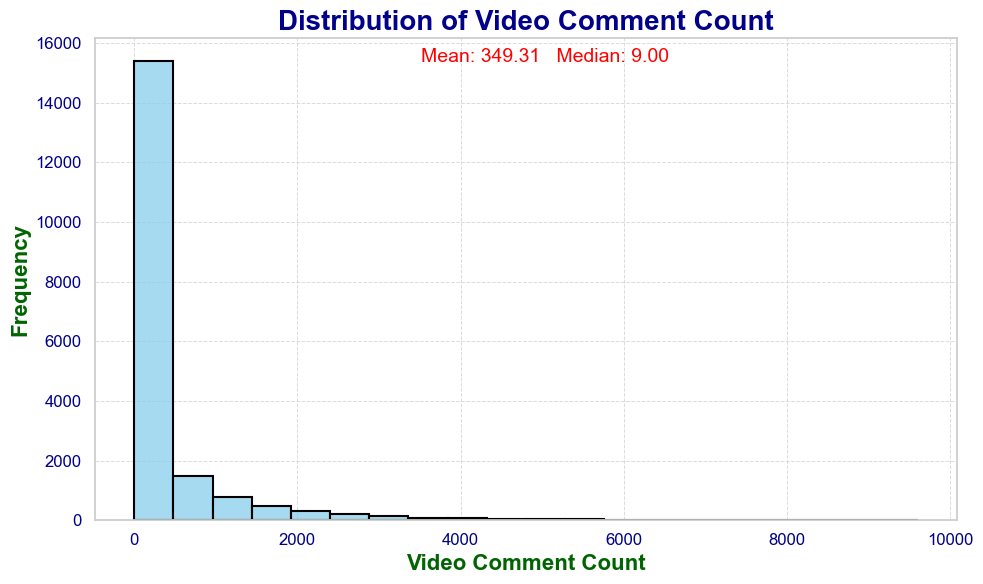

In [15]:
# Create a histogram
feature = 'video_comment_count'

sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data[feature], bins=20, color="skyblue", edgecolor="black", linewidth=1.5, kde=False)

# Customize the title and labels
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel(f"{feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Add some text annotation (optional)
plt.text(plt.xlim()[1]*0.5, plt.ylim()[1]*0.95, f'Mean: {data[feature].mean():.2f}   Median: {data[feature].median():.2f}', fontsize=14, color='red', ha='center')

# Display the plot
plt.tight_layout()
plt.show()


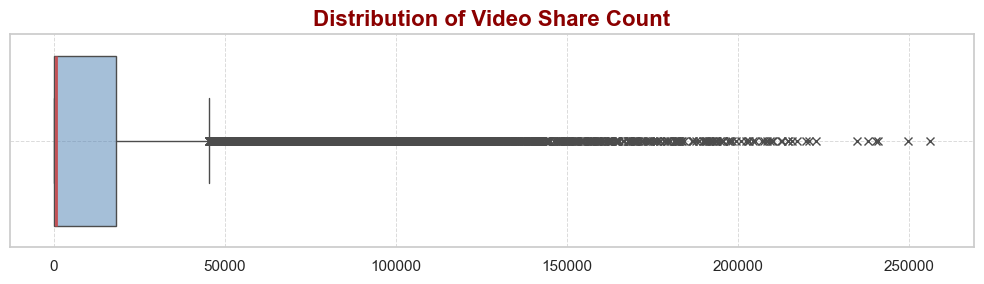

In [16]:
# Create a boxplot to visualize distribution of `video_share_count`
feature = 'video_share_count'

plt.figure(figsize=(10, 3))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

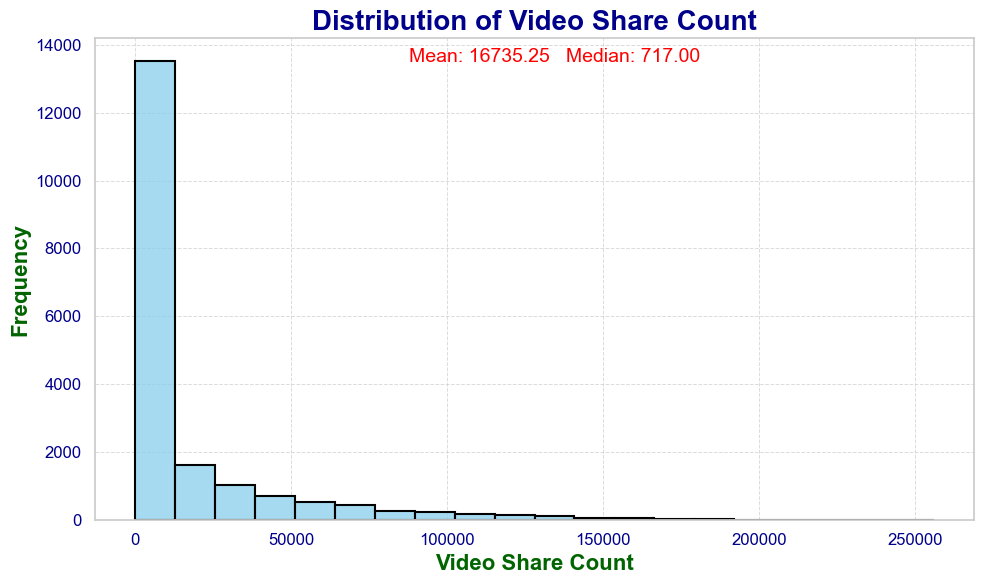

In [17]:
# Create a histogram
feature = 'video_share_count'

sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data[feature], bins=20, color="skyblue", edgecolor="black", linewidth=1.5, kde=False)

# Customize the title and labels
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel(f"{feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Add some text annotation (optional)
plt.text(plt.xlim()[1]*0.5, plt.ylim()[1]*0.95, f'Mean: {data[feature].mean():.2f}   Median: {data[feature].median():.2f}', fontsize=14, color='red', ha='center')

# Display the plot
plt.tight_layout()
plt.show()



#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

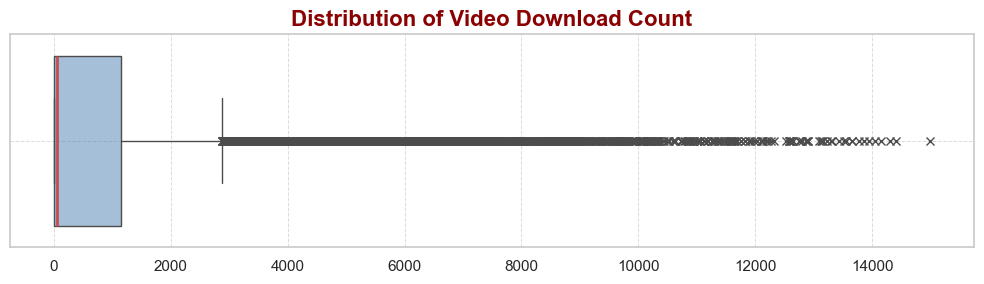

In [18]:
# Create a boxplot to visualize distribution of `video_download_count`
feature = 'video_download_count'

plt.figure(figsize=(10, 3))  # width=10, height=6 in inches
sns.boxplot(data=data, x=feature, flierprops={"marker": "x"}, boxprops={"facecolor": (.3, .5, .7, 0.5)}, medianprops={"color": "r", "linewidth": 2})

# Customize the labels and title
plt.xlabel("", fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel("Total Bill ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkred')

# Customize the ticks
# plt.xticks(fontsize=12, rotation=45, color='purple')
# plt.yticks(fontsize=12, color='purple')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Get the current Axes object
ax = plt.gca()

# Customize the axis spines (optional)
# sns.despine(left=False, bottom=False)

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

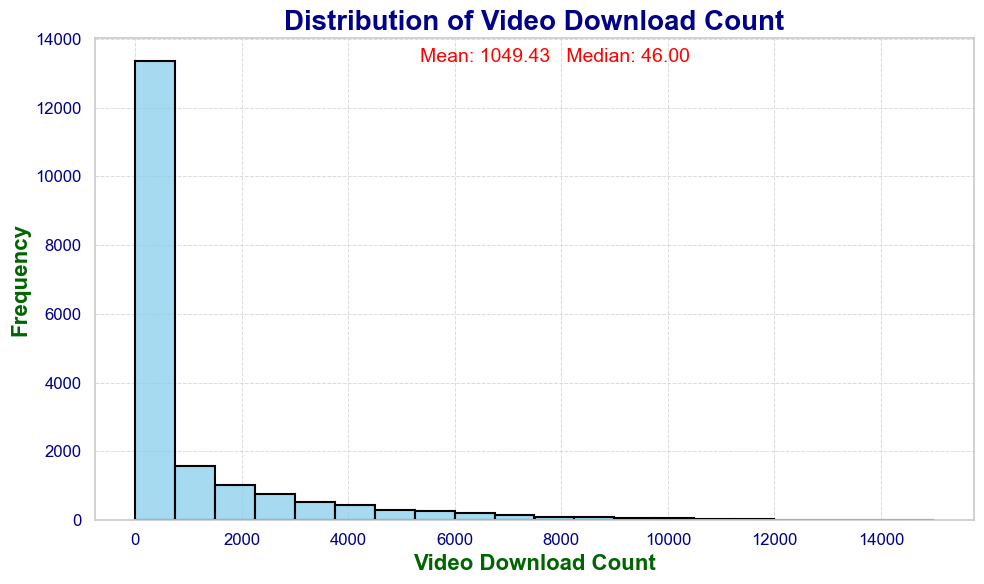

In [19]:
# Create a histogram
feature = 'video_download_count'

sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data[feature], bins=20, color="skyblue", edgecolor="black", linewidth=1.5, kde=False)

# Customize the title and labels
plt.title(f"Distribution of {feature.replace('_',' ').title()}", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel(f"{feature.replace('_',' ').title()}", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Add some text annotation (optional)
plt.text(plt.xlim()[1]*0.5, plt.ylim()[1]*0.95, f'Mean: {data[feature].mean():.2f}   Median: {data[feature].median():.2f}', fontsize=14, color='red', ha='center')

# Display the plot
plt.tight_layout()
plt.show()


#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

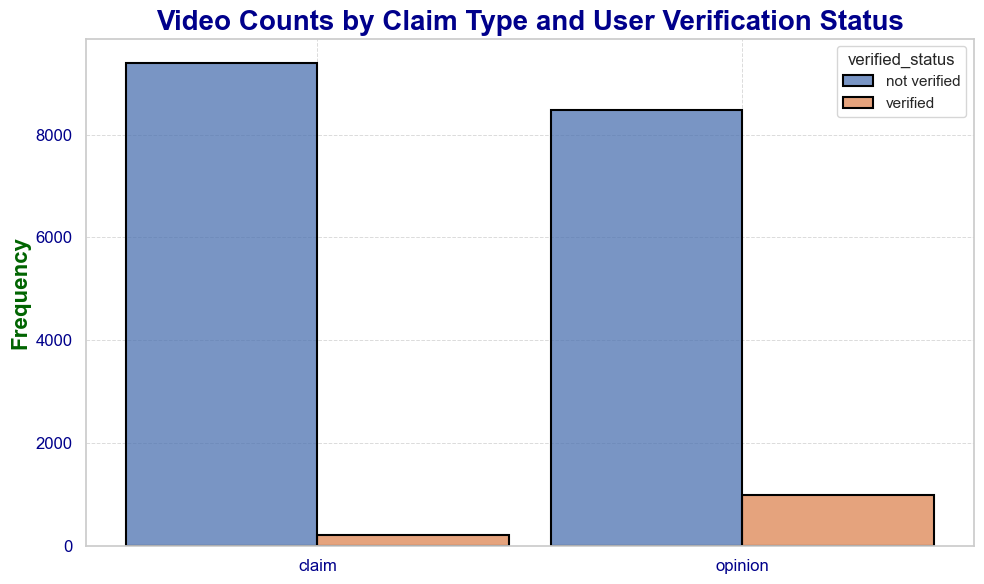

In [20]:
# Create a histogram
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=data, x='claim_status', hue='verified_status', edgecolor="black", linewidth=1.5, kde=False, multiple='dodge',shrink=0.9)

# Customize the title and labels
plt.title(f"Video Counts by Claim Type and User Verification Status", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()

# Save the plot with high DPI
plt.savefig('Figures/Video counts by claim and verification status.png', dpi=300)

plt.show()


There are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

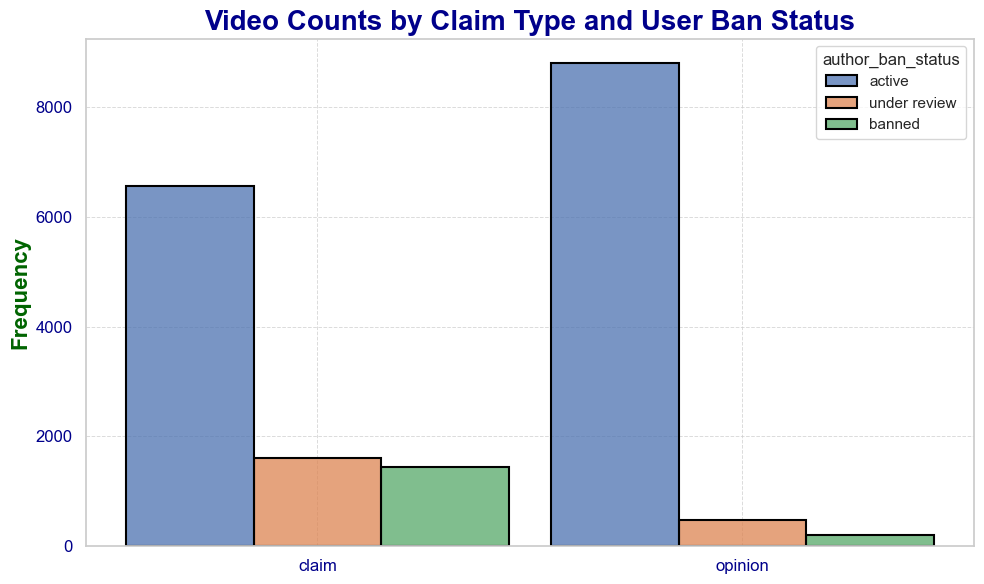

In [21]:
# Create a histogram
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=data, x='claim_status', hue='author_ban_status', hue_order=['active', 'under review', 'banned'], edgecolor="black", linewidth=1.5, multiple='dodge',shrink=0.9)

# Customize the title and labels
plt.title(f"Video Counts by Claim Type and User Ban Status", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("", fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkgreen')

# Customize the ticks
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the axis spines
# sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()

# Save the plot with high DPI
plt.savefig('Figures/Video counts by claim and User ban status.png', dpi=300)


plt.show()

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

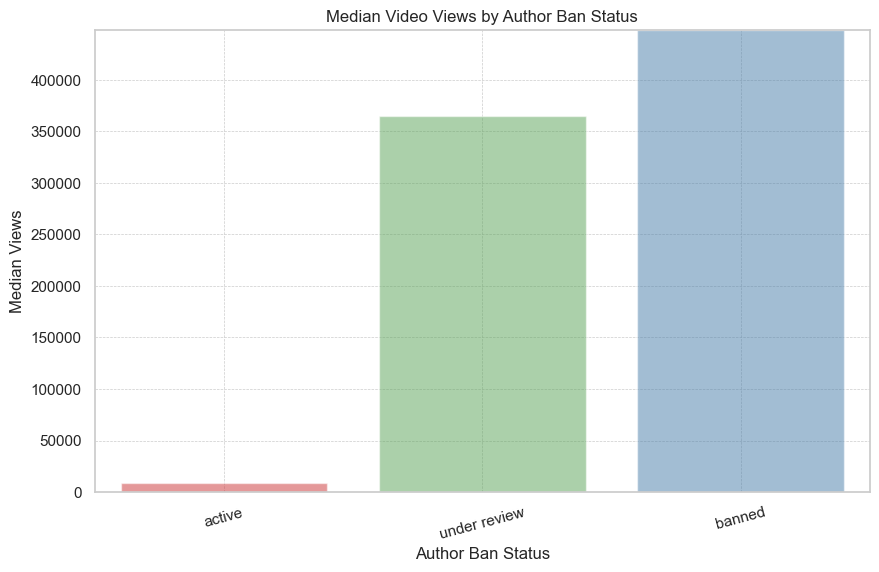

In [22]:
# Create a bar plot

median_views = data.groupby('author_ban_status')[['video_view_count']].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=median_views, x='author_ban_status', y='video_view_count', palette='Set1', hue='author_ban_status', order=['active', 'under review', 'banned'], alpha=0.5)

# Customize the plot for better visuals
plt.title('Median Video Views by Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Median Views')
plt.ylim(0, median_views['video_view_count'].max() + 50)  # Adjust y-axis limit for better spacing
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the plot with high DPI
plt.savefig('Figures/Mean video views by author ban status.png', dpi=300)

plt.show()

The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of claim status.

Indeed, a quick check of the median view count by claim status bears out this assessment:

In [23]:
# Calculate the median view count for claim status.
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

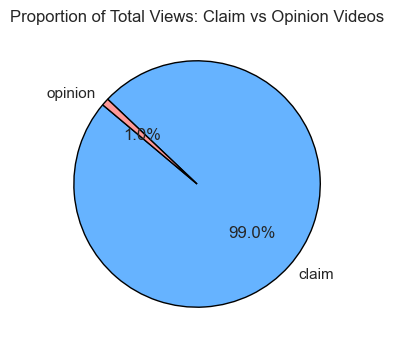

In [24]:
# Create a pie graph

# Aggregate the total views for claim and opinion videos
view_sums = data.groupby('claim_status')[['video_view_count']].sum()

# Create a pie chart
colors = ['#66b3ff', '#ff9999']  # Custom colors for a beautiful representation
labels = view_sums.index
plt.figure(figsize=(4, 4))
plt.pie(view_sums['video_view_count'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Proportion of Total Views: Claim vs Opinion Videos')

# Display the plot
plt.show()

The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [25]:
columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
data_new = pd.DataFrame(columns=data.columns)
for i in columns:
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    outlier = data[i].quantile(0.50) + IQR
    outlier_count = data[data[i] > outlier]['claim_status'].count()
    print(f"Number of outliers, {i}: {outlier_count}")
    # data_new = pd.concat([data_new, data[data[i] > outlier]], ignore_index=True)

# print(data_new.shape)
# data_new = data_new.drop_duplicates()
# print(data_new.shape)
# print(data.shape)

Number of outliers, video_view_count: 4716
Number of outliers, video_like_count: 4703
Number of outliers, video_share_count: 4686
Number of outliers, video_download_count: 4705
Number of outliers, video_comment_count: 4709


#### **Scatterplot**

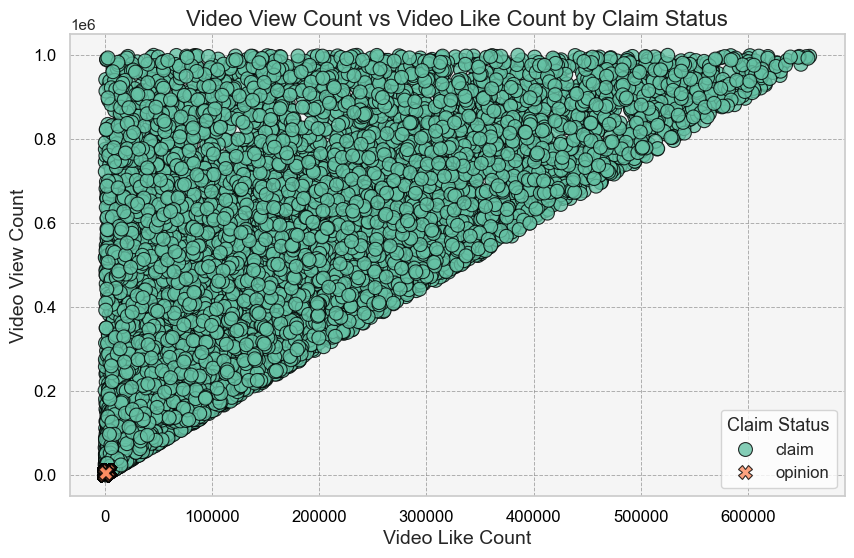

In [26]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(10, 6))  # Set figure size for better clarity
sns.scatterplot(
    data=data, 
    x='video_like_count', 
    y='video_view_count',
    s=100,  # Set marker size
    hue='claim_status', 
    palette='Set2',        # Use the Set2 palette for color differentiation
    style='claim_status',  # Different marker styles for each claim_status
    edgecolor="black",  # Outline color of markers
    alpha=0.8                   # Adjust transparency for better visibility of overlapping points
)

# Add a title and labels with custom fonts and sizes
plt.title('Video View Count vs Video Like Count by Claim Status', fontsize=16)
plt.xlabel('Video Like Count', fontsize=14)
plt.ylabel('Video View Count', fontsize=14)

# Customize the ticks on the axes
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Claim Status', fontsize=12, title_fontsize=13)

# Add a grid with custom style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.6)

# Add a background color for the plot
plt.gca().set_facecolor('whitesmoke')

# Save the plot with high DPI
plt.savefig('Figures/Video view counts by claim status.png', dpi=300)

# Show the plot
plt.show()

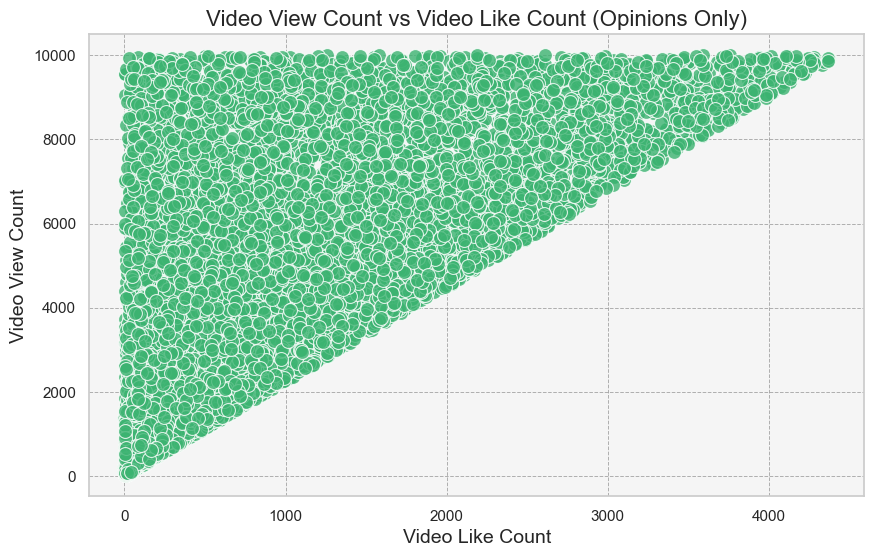

In [27]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
# Filter the data to include only rows where 'content_type' is 'opinion'
opinions_data = data[data['claim_status'] == 'opinion']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
sns.scatterplot(
    data=opinions_data,
    x='video_like_count', 
    y='video_view_count',
    color='mediumseagreen',  # Use a single color for all points
    s=100,                   # Adjust the marker size
    alpha=0.8                # Set transparency for better visibility
)

# Add labels and title
plt.title('Video View Count vs Video Like Count (Opinions Only)', fontsize=16)
plt.xlabel('Video Like Count', fontsize=14)
plt.ylabel('Video View Count', fontsize=14)

# Add a grid with custom style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.6)

# Add a background color for the plot
plt.gca().set_facecolor('whitesmoke')

# Show the plot
plt.show()

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**


* Examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. 
* Analyzed correlations between variables, particularly between the claim_status variable and others.
* Further investigation of distinctive characteristics that apply only to claims or only to opinions can be performed. Other variables that might be helpful in understanding the data could also be considered.
* Client would want to know the assumptions regarding what data might be predictive of claim_status.